# Analysis of Apartmets for Sale in Baku

---------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data.csv', converters={'Locations': pd.eval})
df.head(5)

,ID,Seller,Category,Locations,Price,Currency,Rooms,Area,Floor
0,2827728,Owner,Kohna tikili,"[Memar Acami m., Nasimi r., 4-cu mikrorayon q.]",89500,AZN,2,45.0,3
1,2760725,Agentlik,Yeni tikili,"[Binaqadi r., Bilacari q.]",75653,AZN,2,72.1,2
2,2872711,Owner,Yeni tikili,[Narimanov r.],155000,AZN,2,97.0,9
3,2881028,Agentlik,Yeni tikili,[Xatai r.],86500,AZN,2,71.0,5
4,2898312,Owner,Kohna tikili,"[Nizami r., 8-ci kilometr q.]",85000,AZN,2,45.0,2


In [3]:
pd.set_option('display.max_rows', None) # to display all rows completely

In [4]:
df.describe()

,ID,Price,Rooms,Area,Floor
count,2.784900e+04,2.784900e+04,27849.00000,27849.000000,27849.000000
mean,2.830468e+06,2.048658e+05,2.82854,119.518934,8.024848
std,2.217638e+05,1.829435e+05,0.95033,1259.504222,4.969964
min,2.494300e+04,9.900000e+01,1.00000,12.000000,1.000000
25%,2.840979e+06,1.100000e+05,2.00000,70.000000,4.000000
50%,2.887768e+06,1.580000e+05,3.00000,96.200000,7.000000
75%,2.903138e+06,2.400000e+05,3.00000,135.000000,12.000000
max,2.917435e+06,4.665000e+06,19.00000,161000.000000,27.000000


#### Remove duplicate rows if they exist

In [5]:
if len(df) - len(df['ID'].unique()) != 0:
    df = df.drop_duplicates(subset=['ID'])

#### Convert prices in USD to AZN if they exist

In [6]:
if 'USD' in df['Currency'].unique():
    df.loc[df['Currency'] == 'USD', 'Price'] = df['Price']*1.7
    df.loc[df['Currency'] == 'USD', 'Currency'] = 'AZN'

In [7]:
df['Locations'].explode().value_counts()

Yasamal r.               5523
Nasimi r.                4545
Xatai r.                 4298
Narimanov r.             3359
Nizami r.                1902
Binaqadi r.              1773
Yeni Yasamal q.          1272
Inshaatchilar m.         1266
Sabail r.                1192
Shah Ismayil Xatai m.    1164
Yasamal q.               1015
Ahmadli q.                989
Elmlar Akademiyasi m.     971
Nariman Narimanov m.      957
Hazi Aslanov m.           907
Memar Acami m.            894
28 May m.                 815
8-ci kilometr q.          732
Qara Qarayev m.           693
Nizami m.                 658
Ahmadli m.                634
20 Yanvar m.              595
9-cu mikrorayon q.        518
Neftchilar m.             498
Hazi Aslanov q.           470
8-ci mikrorayon q.        427
Ganclik m.                424
Sahil m.                  388
Xalqlar Dostlugu m.       378
Absheron r.               375
8 Noyabr m.               373
4-cu mikrorayon q.        347
Sabunchu r.               343
Azadliq Pr

In [8]:
# df.loc[df['Floor'] == max(df['Floor'])]

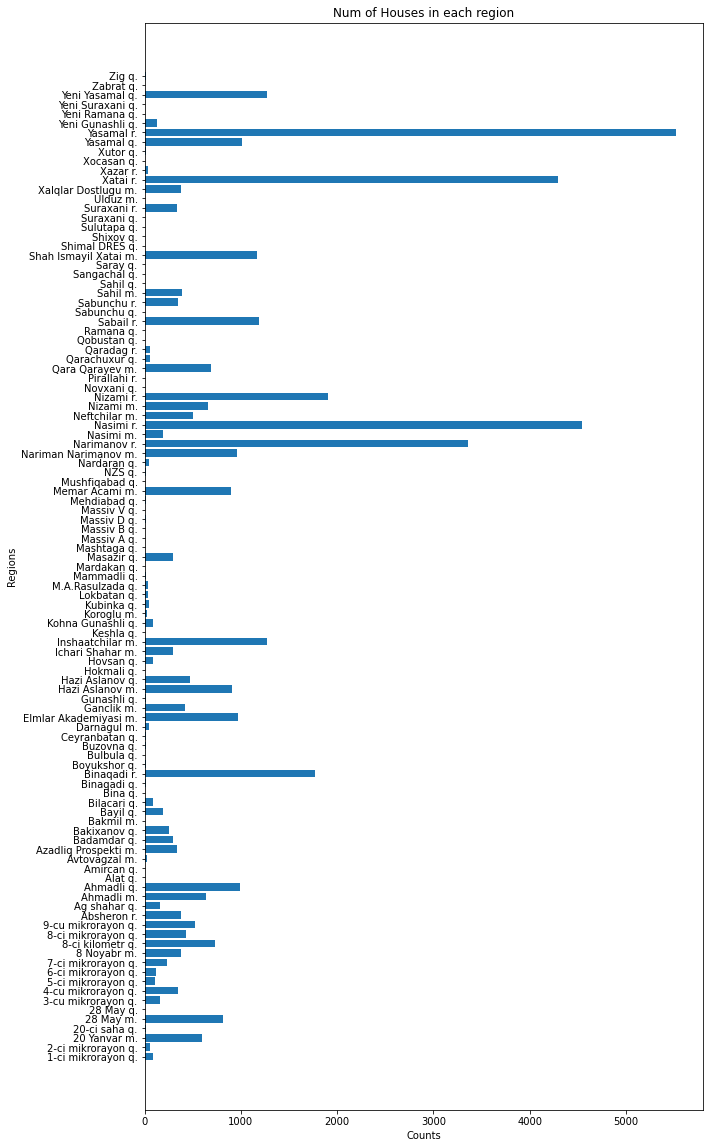

In [30]:
locs = df['Locations'].explode().value_counts()

locs = dict(locs)
lists = sorted(locs.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize=(10,20))
plt.barh(x, y)
plt.title("Num of Houses in each region")
plt.xlabel("Counts")
plt.ylabel("Regions")
plt.show()

In [64]:
rayon = df.loc['m.' in [x[-2:] for x in df['Locations'].tolist()]]
rayon

KeyError: 'False: boolean label can not be used without a boolean index'

In [50]:
print('yes') if 'm.' in [[y[-2:] for y in x] for x in df['Locations']] else print('no')

no


In [60]:
a = ['Memar Acami m.', 'Nasimi r.', '4-cu mikrorayon q.']

if 'm.' in [x[-2:] for x in a]:
    print('yes')

yes


In [ ]:
metro_df = pd.DataFrame(columns=df.columns)
for x, y in df.iterrows():
    for loc in y['Locations']:
        if loc[-2:] == 'm.':
            metro_df = pd.concat([metro_df, df.iloc[x]], ignore_index=True)

In [97]:
df.iloc[0]

ID                                                   2827728
Seller                                                 Owner
Category                                        Kohna tikili
Locations    [Memar Acami m., Nasimi r., 4-cu mikrorayon q.]
Price                                                  89500
Currency                                                 AZN
Rooms                                                      2
Area                                                    45.0
Floor                                                      3
Name: 0, dtype: object